In [3]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
cursor = conn.cursor()
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [4]:
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [7]:
pd.read_sql_query("PRAGMA TABLE_INFO(facts)",conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,1,None,1
1,1,code,varchar(255),1,None,0
2,2,name,varchar(255),1,None,0
3,3,area,integer,0,None,0
4,4,area_land,integer,0,None,0
5,5,area_water,integer,0,None,0
6,6,population,integer,0,None,0
7,7,population_growth,float,0,None,0
8,8,birth_rate,float,0,None,0
9,9,death_rate,float,0,None,0


Description for some of the columns

- name - Name of the country
- area -  The total land and sea area of the country
- area_land - The total land area of the country
- area_water - The total area under water of the country
- population - The country's population
- population_growth - Population as a precentage per year
- birth_rate - Number of births per 1000 people per year
- death_rate - Number of deaths per 1000 people per year

There is a [summary](https://github.com/factbook/factbook/blob/master/SUMMARY.md) in the git repository. There it is stated " The World Factbook includes 267 entries - 195 sovereign countries / 2 others / 58 dependencies / 6 miscellaneous / 5 oceans / 1 world "

In [8]:
q1 = "SELECT * FROM facts"

In [13]:
cursor.execute(q1)
five_results = cursor.fetchmany(5)
print(five_results)

[(1, 'af', 'Afghanistan', 652230, 652230, 0, 32564342, 2.32, 38.57, 13.89, 1.51, '2015-11-01 13:19:49.461734', '2015-11-01 13:19:49.461734'), (2, 'al', 'Albania', 28748, 27398, 1350, 3029278, 0.3, 12.92, 6.58, 3.3, '2015-11-01 13:19:54.431082', '2015-11-01 13:19:54.431082'), (3, 'ag', 'Algeria', 2381741, 2381741, 0, 39542166, 1.84, 23.67, 4.31, 0.92, '2015-11-01 13:19:59.961286', '2015-11-01 13:19:59.961286'), (4, 'an', 'Andorra', 468, 468, 0, 85580, 0.12, 8.13, 6.96, 0.0, '2015-11-01 13:20:03.659945', '2015-11-01 13:20:03.659945'), (5, 'ao', 'Angola', 1246700, 1246700, 0, 19625353, 2.78, 38.78, 11.49, 0.46, '2015-11-01 13:20:08.625072', '2015-11-01 13:20:08.625072')]


In [47]:
q2 = "SELECT * FROM facts LIMIT 5;"

In [48]:
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [32]:
q3 = '''
SELECT
MIN(population) as min_pop,
MAX(population) as max_pop,
MIN(population_growth) as min_pop_growth,
MAX(population_growth) as max_pop_growth
FROM facts
'''

In [33]:
pd.read_sql_query(q3,conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


let's look at these max and min population  

In [74]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts)"
q5 = "SELECT * FROM facts WHERE population = 0"

In [75]:
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


World total is in the dataframe and show the total for all the countries.

In [76]:
pd.read_sql_query(q5,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


Antarctica is the only entry in the dataframe with population set to 0

# Histograms of population, growth, birth and death

In [35]:
q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE name != "World"
AND name != "Antarctica"
'''

In [37]:
pgbd = pd.read_sql_query(q6,conn)

In [38]:
pgbd.head()

,population,population_growth,birth_rate,death_rate
0,32564342.0,2.32,38.57,13.89
1,3029278.0,0.30,12.92,6.58
2,39542166.0,1.84,23.67,4.31
3,85580.0,0.12,8.13,6.96
4,19625353.0,2.78,38.78,11.49


/Users/bjornkristmannsson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114f3c9b0>,
      dtype=object)

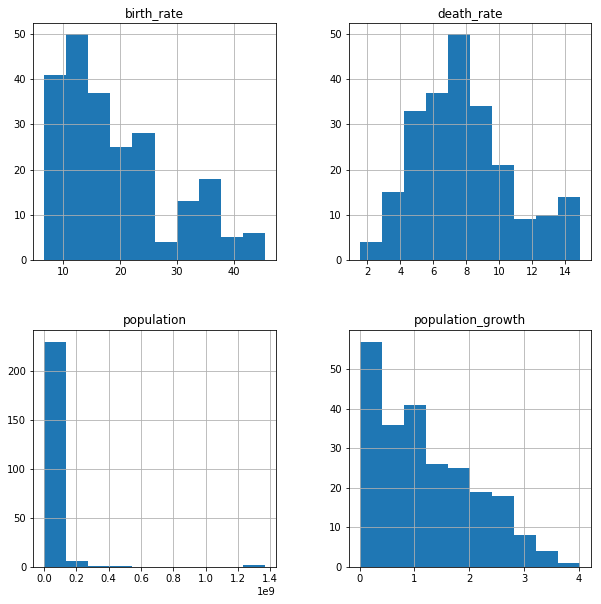

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pgbd.hist(ax=ax)

# Population density

In [56]:
q7 = '''
SELECT name,(population/area_land) AS density
FROM facts
WHERE name != "World"
AND name != "Antarctica"
ORDER BY density DESC
'''

In [57]:
dens = pd.read_sql_query(q7, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118556438>]],
      dtype=object)

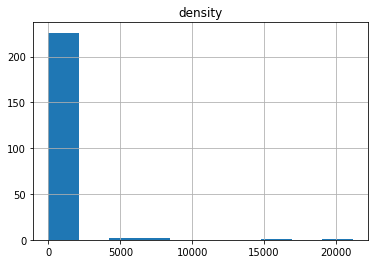

In [58]:
fig = plt.figure(figsize=(7,7))
dens.hist()

In [59]:
q8 = '''
SELECT name, (CAST(area_land as float)/CAST(area as float)) AS land_ratio
FROM facts
WHERE name != "World"
AND name != "Antarctica"
AND land_ratio != "NaN"
ORDER BY land_ratio
'''

In [60]:
pd.read_sql_query(q8,conn)

,name,land_ratio
0,British Indian Ocean Territory,0.001103
1,Virgin Islands,0.181152
2,"Saint Helena, Ascension, and Tristan da Cunha",0.396104
3,Puerto Rico,0.643173
4,"Bahamas, The",0.721182
5,Guinea-Bissau,0.778408
6,Malawi,0.794031
7,Netherlands,0.815853
8,Uganda,0.817713
9,Eritrea,0.858844


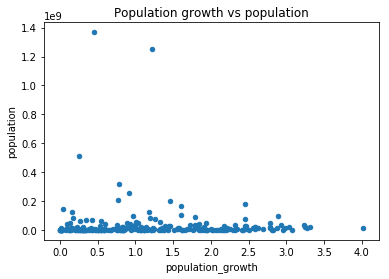

In [63]:
pgbd.plot(x='population_growth', y='population', kind='scatter', title='Population growth vs population')

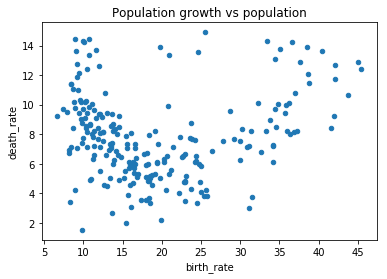

In [64]:
pgbd.plot(x='birth_rate', y='death_rate', kind='scatter', title='Birth rate vs death rate')

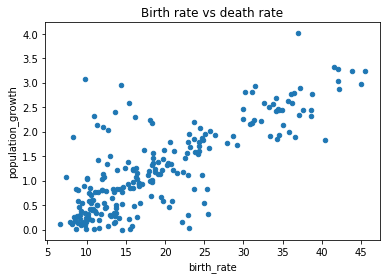

In [68]:
pgbd.plot(x='birth_rate', y='population_growth', kind='scatter', title='Birth rate vs population growth')

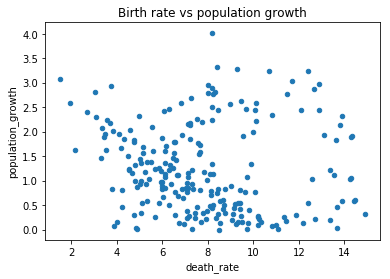

In [70]:
pgbd.plot(x='death_rate', y='population_growth', kind='scatter', title='Death rate vs population growth')